# MORAI Sensor Kit tutorial

MORAI SIM API 튜토리얼 입니다. 

## A Gentle Introduction to MORAI-KIT

본 튜토리얼에서는 주로 사용하는 기능과 타입에 대한 간단한 사용법에 대해 설명합니다.

1. `Vector3` - 입력 기본 단위 타입 - x, y, z.
2. `Location` - 입력 위치값 타입 - x, y, z.
3. `Rotation` - 입력 회전값 타입 - roll, pitch, yaw.
4. `Transform` - 입력 포즈값 타입 - location, rotation.
5. `ObjectParams` - 입력 오브젝트 변수값 타입 - scale, object_name.
6. `connect` - MORAI 시뮬레이터와 API 연결.
7. `initialize` - API 초기화.
8. `get_ego_transform` - Ego 차량의 현재 포즈 정보.
9. `set_camera` - Ego 차량 중심(뒤축 중앙)로부터 상대위치에 카메라 생성.
10. `remove_camera` - 카메라 제거.
11. `spawn_object` - Ego 차량으로부터 특정 거리만큼 떨어진 위치에 물체 생성.
12. `remove_object` - 생성된 물체 제거.
13. `capture_data` - 설치된 센서들로부터 1프레임 데이터 취득.
14. `Data Generation Example` - 특정 간격에 따른 데이터 취득 예제.

## Installation

In [21]:
# !pip install jupyter


In [4]:
!pip install morai-kit==1.1.0

     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
  Attempting uninstall: morai-kit
    Found existing installation: morai-kit 1.0.1
    Uninstalling morai-kit-1.0.1:
      Successfully uninstalled morai-kit-1.0.1


## MORAI-KIT Types

In [5]:
from moraikit.sensor import SensorApi
from moraikit.types import Vector3, Location, Rotation, Transform, ObjectParams 

### 1. `Vector3`

x, y, z 를 정의하는 기본 타입

In [4]:
vector = Vector3(1, 2, 1)
print(vector.x, vector.y, vector.z)

1 2 1


### 2. `Location`

In [5]:
location = Location(x=1, y=2, z=3)
print(location.x, location.y, location.z)

1 2 3


### 3. `Rotation`

In [6]:
rotation = Rotation(roll=0, pitch=0, yaw=30)
print(rotation.roll, rotation.pitch, rotation.yaw)

0 0 30


### 4. `Transform`

In [7]:
trasform = Transform(location, rotation)
print(trasform.location.x, trasform.location.y, trasform.location.z)
print(trasform.rotation.roll, trasform.rotation.pitch, trasform.rotation.yaw)

1 2 3
0 0 30


### 5. `ObjectParams`

물체를 생성할 때 사용하는 변수그룹입니다.

`Object_name` : 생성할 물체 이름

`scale` : 생성할 물체의 스케일

In [8]:
op = ObjectParams()
op.object_name = 'SportBike'
op.scale = Vector3(1, 1, 1)

## MORAI-SIM Initialization

본 튜토리얼은 맵과 차량을 선택 후 맵에 진입한 이후에 진행합니다.

### 6. `connect`

In [6]:
DEFAULT_MORAI_SIM_ADDR = '127.0.0.1'
DEFAULT_MORAI_SIM_PORT = 7789

# Create api
api = SensorApi()

# Connect
api.connect(DEFAULT_MORAI_SIM_ADDR, DEFAULT_MORAI_SIM_PORT)

In [7]:
api.is_connected()


True

### 7. `initialize`

In [8]:
# Initialize
api.initialize()

## MORAI-KIT Basics

주로 사용할 기능들에 대해 소개합니다.

### 8. `get_ego_transform`

Ego 차량 중심좌표의 월드 포즈 정보를 얻습니다. MORAI-SIM 에서 차량의 중심좌표는 뒷축 중앙 위치로 정의합니다.

`location` : meters

`rotation` : degrees

In [9]:
ego_transform = api.get_ego_transform()
print(ego_transform.location.x, ego_transform.location.y, ego_transform.location.z)
print(ego_transform.rotation.roll, ego_transform.rotation.pitch, ego_transform.rotation.yaw)

907.0658569335938 1.750013828277588 0.03513205051422119
0.0005156420520506799 0.18986615538597107 -179.99974060058594


### 9. `set_camera`

Ego 차량으로부터 상대 위치에 카메라를 설치합니다. 이때 설정하는 카메라 포즈는 카메라 렌즈를 기준으로 정의합니다.

In [11]:
sensor_transform = Transform(Location(x=5, y=0, z=2), Rotation(roll=0, pitch=30, yaw=30))
response = api.set_camera(transform=sensor_transform)
print(response)

res_list {
  success: true
  target_id: "0"
  sensor_id: "0"
}



### 10. `remove_camera`

In [12]:
response = api.remove_camera(sensor_id=0)
print(response)

res_list {
  success: true
  target_id: "0"
  sensor_id: "0"
}



### 11. `spawn_object`

Ego 차량으로부터 특정 거리만큼 떨어진 위치에 물체를 생성합니다.

In [13]:
op = ObjectParams()
op.object_name = 'OBJ_Hyundai_Grandeur'
op.scale = Vector3(1, 1, 1)

In [14]:
obj_id = api.spawn_object(distance=3, obj_params= op)
print(obj_id)

1


### 12. `remove_object`

In [15]:
api.remove_object(object_id=obj_id)

### 13. `capture_data`

생성된 이미지 데이터는 MORAI-SIM 이 설치된 폴더로부터 `~/MoraiLauncher_Win/MoraiLauncher_Win_Data/SaveFile/SensorData` 위치에 저장됩니다.

In [34]:
api.capture_data()

### 14. `Data Generation example`

In [19]:
sensor_transform = Transform(Location(x=2, y=0, z=1), Rotation(roll=0, pitch=0, yaw=0))
response = api.set_camera(transform=sensor_transform)
print(response)

res_list {
  success: true
  target_id: "0"
  sensor_id: "0"
}



In [20]:
op = ObjectParams()
op.object_name = 'OBJ_Hyundai_Grandeur'
op.scale = Vector3(1, 1, 1)

In [21]:
import time
collecting_frames = 5
distance_interval = 5

for i in range(collecting_frames):
    f = i+1
    obj_id = api.spawn_object(distance=distance_interval*f, obj_params= op)
    file_name = str(f)
    dir_name = "katech"
    api.capture_data_custom(file_name=file_name, file_dir=dir_name)
    time.sleep(0.1)
    api.remove_object(object_id=obj_id)
    time.sleep(0.1)

### 15. `Results`

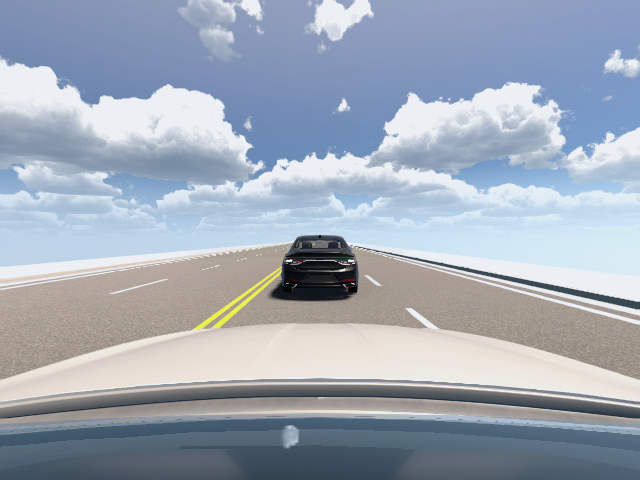

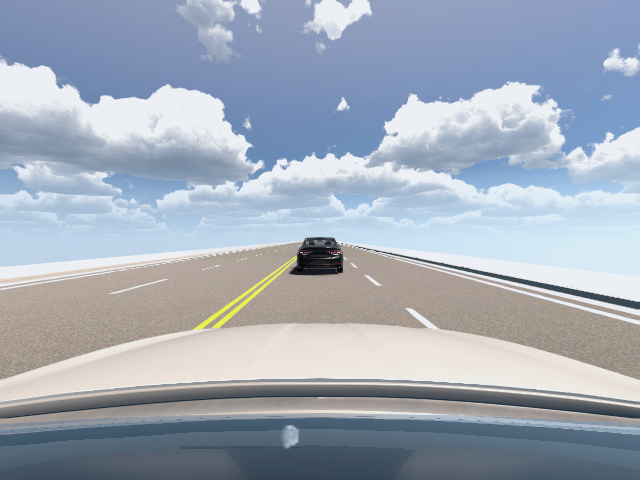

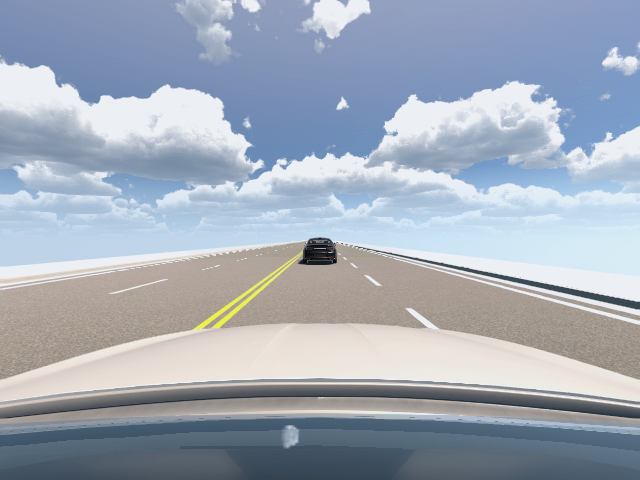

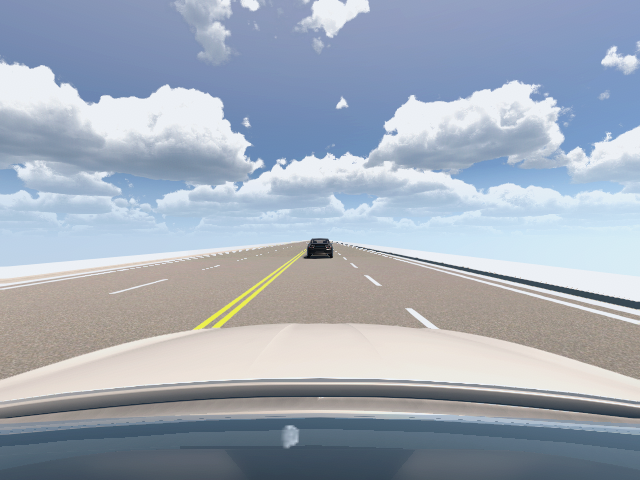

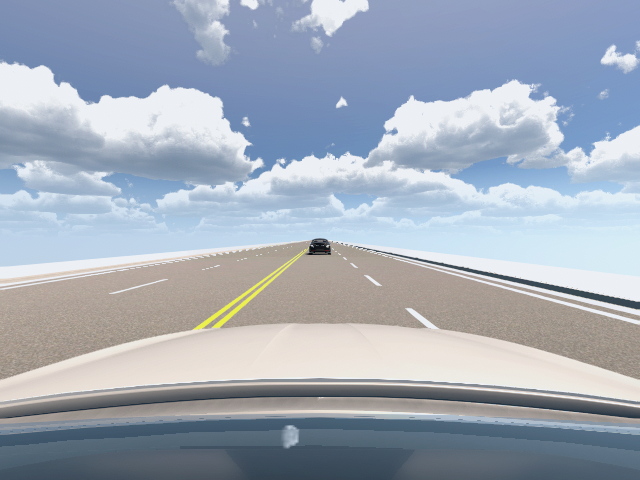